Uma empresa de viagens gostaria de melhorar os seus resultados financeiros atuando no
índice de cancelamento de passagens compradas, para isso ela necessita entender o perfil
dos usuários com maior propensão a cancelamento e indicar esses possíveis clientes no
momento da venda de uma nova passagem.
Com base neste desafio:
1) Quais as características que aumentam o risco de um cancelamento?
2) Proponha uma maneira de indicar clientes com alto risco de cancelamento no
momento de uma venda.

Expectativa de entrega:
1. Construir uma apresentação dos resultados
2. Material utilizado para análise (códigos,etc)


Variáveis:
- Created: horário de registro do ticket.  
- CancelTime: hora em que o passageiro cancelou a passagem, se aplicável.  
- DepartureTime: horário de partida programado para a viagem.  
- BillID: o identificador exclusivo da transação de compra.  
- TicketID: o identificador exclusivo do ticket.  
- ReserveStatus: o status do pagamento do cliente.  
- UserID: o identificador exclusivo do usuário.  
- Male: indica se o bilhete pertence ou não a um passageiro do sexo masculino.  
- Price: o preço do bilhete sem descontos.  
- CouponDiscount: desconto aplicado pelo passageiro na passagem.  
- From: a origem da viagem.  
- To: o destino da viagem.  
- Domestic: Indica se a viagem é nacional ou internacional.  
- VehicleType: especifica detalhes sobre o meio de transporte.  
- VehicleClass: indica se o veículo é de primeira classe ou não.  
- Vehicle: especifica o tipo de veículo.  
- Cancel: indica se o ticket foi cancelado ou não.  
- HashPassportNumber_p: versão com hash do número do passaporte.  
- HashEmail: versão com hash do endereço de e-mail.  
- BuyerMobile: versão com hash do número do celular do comprador.  
- NationalCode: versão hash do número de identificação nacional.  
- TripReason: o motivo da viagem.  

# Pacotes e leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('train_data.csv', parse_dates=['Created','DepartureTime','CancelTime'],
encoding='utf-8')

In [3]:
df.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaT,2022-11-02 23:59:00,39710203,1091777.0000,5,122885.0000,True,6600000.0000,34425.0000,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaT,2022-08-18 04:15:00,38689463,1070902.0000,5,876925.0000,True,9500000.0000,0.0000,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaT,2022-09-21 11:00:00,39245173,7624237.0000,3,916640.0000,False,2000000.0000,0.0000,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaT,2022-06-26 08:30:00,37957585,2867547.0000,2,NaN,False,40000.0000,0.0000,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaT,2022-06-02 23:00:00,37584530,7212559.0000,3,NaN,True,1130000.0000,0.0000,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Created               101017 non-null  datetime64[ns]
 1   CancelTime            15326 non-null   datetime64[ns]
 2   DepartureTime         101017 non-null  datetime64[ns]
 3   BillID                101017 non-null  int64         
 4   TicketID              101017 non-null  float64       
 5   ReserveStatus         101017 non-null  int64         
 6   UserID                42543 non-null   float64       
 7   Male                  101017 non-null  bool          
 8   Price                 101017 non-null  float64       
 9   CouponDiscount        101017 non-null  float64       
 10  From                  101017 non-null  object        
 11  To                    101017 non-null  object        
 12  Domestic              101017 non-null  int64         
 13 

# Hipóteses iniciais:

- O status do pagamento aumenta a chance de cancelamento das passagens.
- Ter descontos diminui a chance de cancelamento das passagens.

# Organização e Limpeza dos dados

## Informações sobre os dados faltantes

In [ ]:
df.isnull().sum()/len(df) 

Created                0.0000
CancelTime             0.8483
DepartureTime          0.0000
BillID                 0.0000
TicketID               0.0000
ReserveStatus          0.0000
UserID                 0.5789
Male                   0.0000
Price                  0.0000
CouponDiscount         0.0000
From                   0.0000
To                     0.0000
Domestic               0.0000
VehicleType            0.0747
VehicleClass           0.3806
TripReason             0.0000
Vehicle                0.0000
Cancel                 0.0000
HashPassportNumber_p   0.9915
HashEmail              0.5735
BuyerMobile            0.0000
NationalCode           0.0000
dtype: float64

## Criando um dicionário para os dias da semana

In [3]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

## Tratando variável Created

In [ ]:
# Criando coluna mês
df['Created_month'] = df['Created'].dt.month.astype(int)

# Criando coluna dia da semana
df['Created_dayofweek'] = df['Created'].dt.dayofweek
df['Created_dayofweek'] = df['Created_dayofweek'].map(dmap)

# Criando coluna hora
df['Created_hour'] = df['Created'].dt.hour.astype(int)

# Dropando a variável
df.drop('Created', axis= 1, inplace = True)

## Tratando variável CancelTime

In [5]:
# Separando as colunas em mês, dia e hora
df['Canceltime_month'] = df['CancelTime'].dt.month
df['Canceltime_dayofweek'] = df['CancelTime'].dt.dayofweek
df['Canceltime_hour'] = df['CancelTime'].dt.hour

# Retornando os NaT como 0
df['Canceltime_month'] = df['Canceltime_month'].apply(lambda x: 0 if pd.isnull(x) else x)
df['Canceltime_dayofweek'] = df['Canceltime_dayofweek'].apply(lambda x: 0 if pd.isnull(x) else x)
df['Canceltime_hour'] = df['Canceltime_hour'].apply(lambda x: 0 if pd.isnull(x) else x)

# Arrumando coluna mês
df['Canceltime_month'] = df['Canceltime_month'].astype(int)

# Arrumando coluna dia da semana
df['Canceltime_dayofweek'] = df['Canceltime_dayofweek']
df['Canceltime_dayofweek'] = df['Canceltime_dayofweek'].map(dmap)

# Arrumando coluna hora
df['Canceltime_hour'] = df['Canceltime_hour'].astype(int)

## Tratando variável DepartureTime

In [ ]:
# Criando coluna mês
df['DepartureTime_month'] = df['DepartureTime'].dt.month.astype(int)

# Criando coluna dia da semana
df['DepartureTime_dayofweek'] = df['DepartureTime'].dt.dayofweek
df['DepartureTime_dayofweek'] = df['DepartureTime_dayofweek'].map(dmap)

# Criando coluna hora
df['DepartureTime_hour'] = df['DepartureTime'].dt.hour.astype(int)

# Dropando a variável
df.drop('DepartureTime',axis = 1, inplace= True) 

## Tratando variável UserID

In [7]:
df['UserID'] = df['UserID'].apply(lambda x: 0 if pd.isnull(x) else 1)

## Convertendo variável Male para Integer

In [8]:
df['Male'] = df['Male'].astype(int)

## Tratando variável CouponDiscount

In [9]:
df['CouponDiscount'] = df['CouponDiscount'].apply(lambda x: 1 if x > 0 else 0)

## Tratando variável VehicleType

In [10]:
def Vehicle(row):
    if row['Vehicle'] in ['Bus', 'Train']:
        return 'Land'
    else:
        return 'Air'

In [11]:
df['VehicleType']= df.apply(Vehicle, axis = 1)

## Tratando variável VehicleClass

### Identificando quais são os tipos de veículo correspondentes aos valores NaN

In [12]:
# Checando qual tipo de veículo corresponde aos NaN da variável 'VehicleClass'

df[df['VehicleClass'].isna()]['Vehicle'].value_counts()

Vehicle
Train    38450
Name: count, dtype: int64

### Classificando em 0 e 1 mantendo os NA, para conseguir separar o dataset futuramente

In [13]:
df['VehicleClass'] = pd.to_numeric(df['VehicleClass'], errors='coerce').astype('Int64')

### Criando um dataframe para classificar a variável 'VehicleClass' através do Random Forest

In [14]:
# Criando o DF
df_VC = df.drop(['CancelTime','BillID', 'TicketID','From','To','HashPassportNumber_p','HashEmail','BuyerMobile','NationalCode','Created_month','Created_dayofweek','Created_hour',
                 'Canceltime_month','Canceltime_dayofweek','Canceltime_hour','DepartureTime_month','DepartureTime_dayofweek','DepartureTime_hour', 'Cancel'], axis = 1)

# Filtrar registros onde 'Vehicle' é ou não trem
df_train = df_VC[df_VC['Vehicle'] == 'Train']  # Dados de trem (todas as VehicleClass são nulas)
df_others = df_VC[df_VC['Vehicle'] != 'Train']  # Dados de outras categorias de veículo

# Separar os dados de 'VehicleClass' completos dos nulos
df_with_class = df_others[df_others['VehicleClass'].notnull()]  # Dados completos
df_missing_class = df_train  # Todos os registros de trem estão nulos


### Preparando as variáveis preditoras (X) e a variável alvo (y)

In [15]:
# Preparando as variáveis
X = df_with_class.drop(['VehicleClass'], axis=1)
y = df_with_class['VehicleClass']

# Transformando as variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

### Train_test_split e treinando o modelo com o dataset completo, utilizando Random Forest

In [16]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Treinar o modelo
rfc = RandomForestClassifier(random_state=101, n_estimators=100)
rfc.fit(X_train, y_train)

# Avaliar o modelo
y_pred = rfc.predict(X_test)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred),
      '\n\n',
      "Acurácia do modelo:", round(accuracy_score(y_test, y_pred),4))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      0.87      0.92      4736
         1.0       0.96      0.99      0.97     14035

    accuracy                           0.96     18771
   macro avg       0.96      0.93      0.95     18771
weighted avg       0.96      0.96      0.96     18771
 

 Acurácia do modelo: 0.9602


### Aplicando o modelo para os dados faltantes, e adicionando-os no dataframe

In [17]:
# Preparando as variáveis preditoras
X_missing = df_missing_class.drop(['VehicleClass'], axis=1)
X_missing = pd.get_dummies(X_missing, drop_first=True)

# Reindexar para garantir a mesma estrutura de colunas
X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

# Fazer a previsão para todos os registros de trem
predicted_classes = rfc.predict(X_missing)

# Adicionar as previsões ao DataFrame original
df.loc[df['Vehicle'] == 'Train', 'VehicleClass'] = predicted_classes

### Voltando a variável para int64

In [18]:
df['VehicleClass'] = pd.to_numeric(df['VehicleClass'], errors='coerce').astype('int64')

# Análise exploratória

## Criando o Dataframe filtrando por passagens canceladas

In [19]:
df_cancel = df[df['CancelTime'].notnull()]

## Cancelamentos por Status de pagamento

### Distribuição dos dias pelos status de pagamento

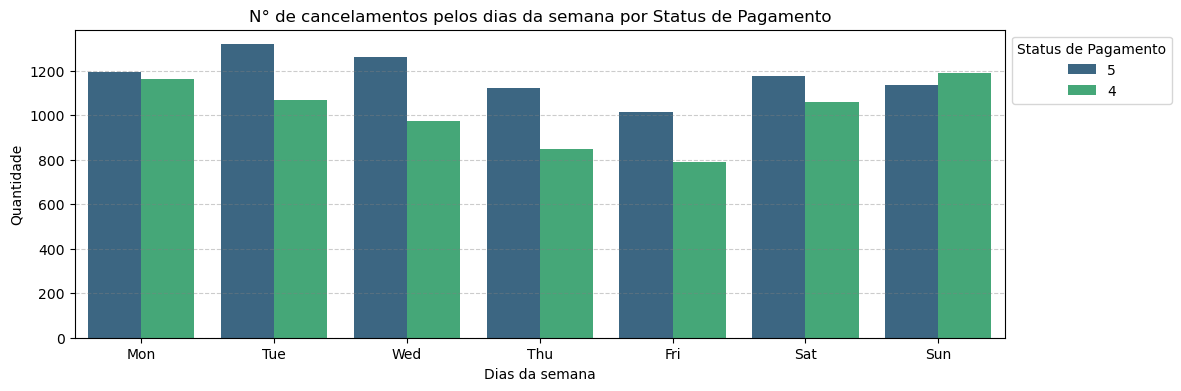

In [20]:
# Alterando tipo de variável
df_cancel['ReserveStatus'] = df_cancel['ReserveStatus'].astype(str)

# Definir a ordem dos dias da semana
dias_da_semana = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Criando Plot
plt.figure(figsize=(12,4))
sns.countplot(data=df_cancel, x='Canceltime_dayofweek', hue='ReserveStatus', palette='viridis', order = dias_da_semana)

# Textos e estilos
plt.title("N° de cancelamentos pelos dias da semana por Status de Pagamento")
plt.legend(title='Status de Pagamento', loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Quantidade")
plt.xlabel("Dias da semana")
plt.grid(axis="y", linestyle="--", alpha=0.4, color = 'grey')

### Distribuição dos meses pelos status de pagamento

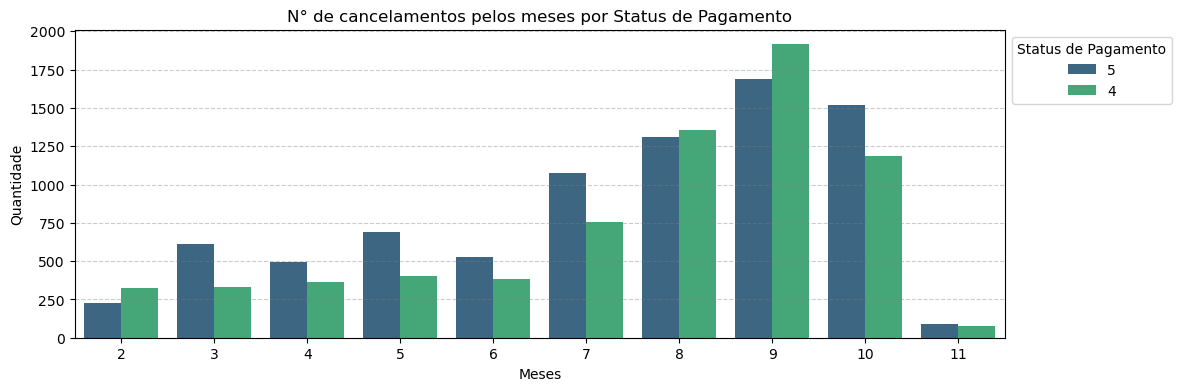

In [21]:
# Alterando o tipo da variável
df_cancel['ReserveStatus'] = df_cancel['ReserveStatus'].astype(str)

# Criando o Plot
plt.figure(figsize=(12,4))
sns.countplot(data=df_cancel, x='Canceltime_month', hue='ReserveStatus', palette='viridis')

# Textos e estilos
plt.title("N° de cancelamentos pelos meses por Status de Pagamento")
plt.legend(title='Status de Pagamento', loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Quantidade")
plt.xlabel("Meses")
plt.grid(axis="y", linestyle="--", alpha=0.4, color = 'grey')

## Cancelamentos por Cupom de desconto

### Distribuição dos dias por Cupom de Desconto

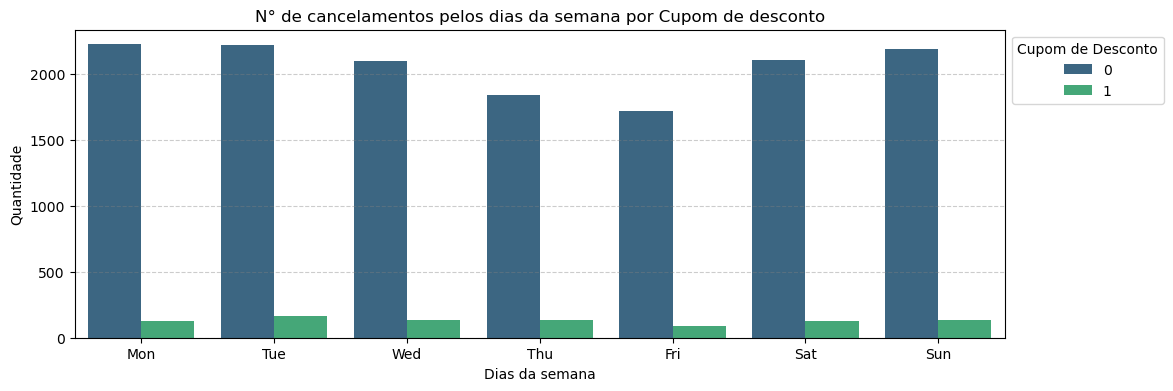

In [26]:
# Alterando o tipo da variável
df_cancel['CouponDiscount'] = df_cancel['CouponDiscount'].astype(str)

# Definir a ordem dos dias da semana
dias_da_semana = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Criando o Plot
plt.figure(figsize=(12,4))
sns.countplot(data=df_cancel, x='Canceltime_dayofweek', hue='CouponDiscount', palette='viridis', order = dias_da_semana)

# Textos e estilos
plt.title("N° de cancelamentos pelos dias da semana por Cupom de desconto")
plt.legend(title='Cupom de Desconto', loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Quantidade")
plt.xlabel("Dias da semana")
plt.grid(axis="y", linestyle="--", alpha=0.4, color = 'grey')

### Distribuição dos meses por Cupom de Desconto

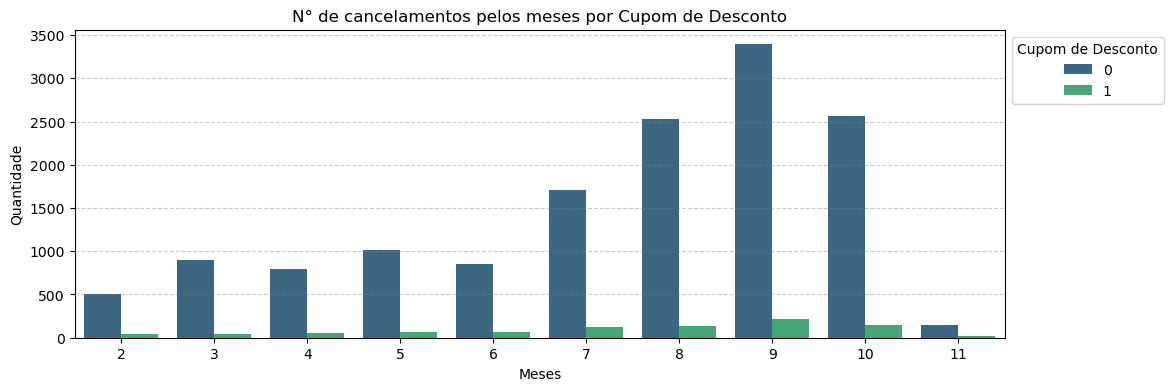

In [27]:
# Alterando o tipo da variável
df_cancel['CouponDiscount'] = df_cancel['CouponDiscount'].astype(str)

# Criando o Plot
plt.figure(figsize=(12,4))
sns.countplot(data=df_cancel, x='Canceltime_month', hue='CouponDiscount', palette='viridis')

# Textos e estilos
plt.title("N° de cancelamentos pelos meses por Cupom de Desconto")
plt.legend(title='Cupom de Desconto', loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Quantidade")
plt.xlabel("Meses")
plt.grid(axis="y", linestyle="--", alpha=0.4, color = 'grey')

### Criando um dataframe, onde as linhas sao os dias da semana, e as colunas as horas

In [22]:
dayHour_S = df_cancel.pivot_table(index='Canceltime_dayofweek', columns= 'Canceltime_hour', values = 'ReserveStatus', aggfunc = 'count')
dayHour_S.head()

Canceltime_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Canceltime_dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,48,53,42,24,14,11,10,39,63,88,...,98,120,113,89,120,89,101,91,94,80
Mon,33,51,21,18,16,15,17,42,77,108,...,145,132,152,129,138,108,161,132,112,114
Sat,50,19,23,17,14,15,14,42,65,80,...,140,139,147,114,142,116,149,113,121,138
Sun,54,49,14,28,6,15,21,27,55,80,...,156,145,146,199,155,85,118,121,134,109
Thu,50,48,42,13,9,10,12,34,52,113,...,116,106,100,103,87,64,98,129,104,127


### Heatmap com o dataframe de dias e horas

<Axes: xlabel='Canceltime_hour', ylabel='Canceltime_dayofweek'>

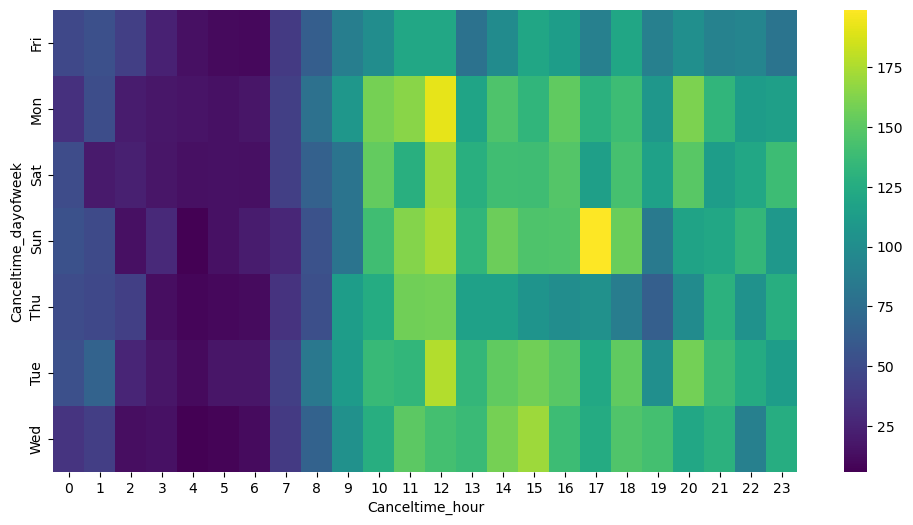

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data = dayHour_S, cmap = 'viridis')

### Criando um dataframe, onde as linhas sao os dias da semana, e as colunas os meses

In [24]:
dayMonth_S = df_cancel.pivot_table(index= 'Canceltime_dayofweek', columns= 'Canceltime_month', values = 'ReserveStatus', aggfunc = 'count')
dayMonth_S.head()

Canceltime_month,2,3,4,5,6,7,8,9,10,11
Canceltime_dayofweek,,,,,,,,,,
Fri,63.0000,91.0000,132.0000,121.0000,101.0000,235.0000,214.0000,553.0000,298.0000,NaN
Mon,82.0000,148.0000,101.0000,186.0000,123.0000,234.0000,488.0000,501.0000,493.0000,NaN
Sat,98.0000,131.0000,142.0000,115.0000,151.0000,310.0000,348.0000,484.0000,458.0000,NaN
Sun,80.0000,122.0000,116.0000,190.0000,97.0000,368.0000,531.0000,366.0000,456.0000,NaN
Thu,62.0000,127.0000,117.0000,118.0000,158.0000,208.0000,230.0000,680.0000,273.0000,NaN


### Heatmap com o dataframe de dias e meses

<Axes: xlabel='Canceltime_month', ylabel='Canceltime_dayofweek'>

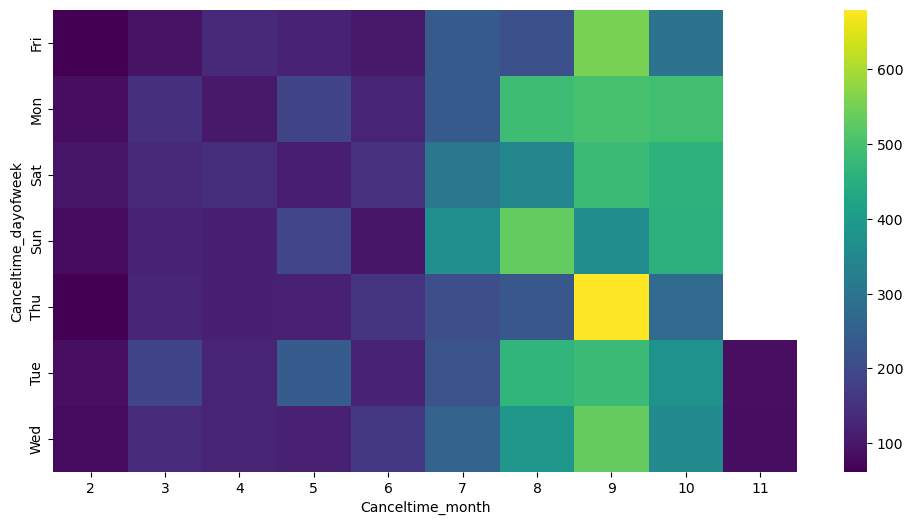

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(data= dayMonth_S, cmap = 'viridis')

## Churn de cancelamento em relação a cada variável

### Distribuição dos status do pagamento, de acordo com o cancelamento

<Figure size 1200x400 with 0 Axes>

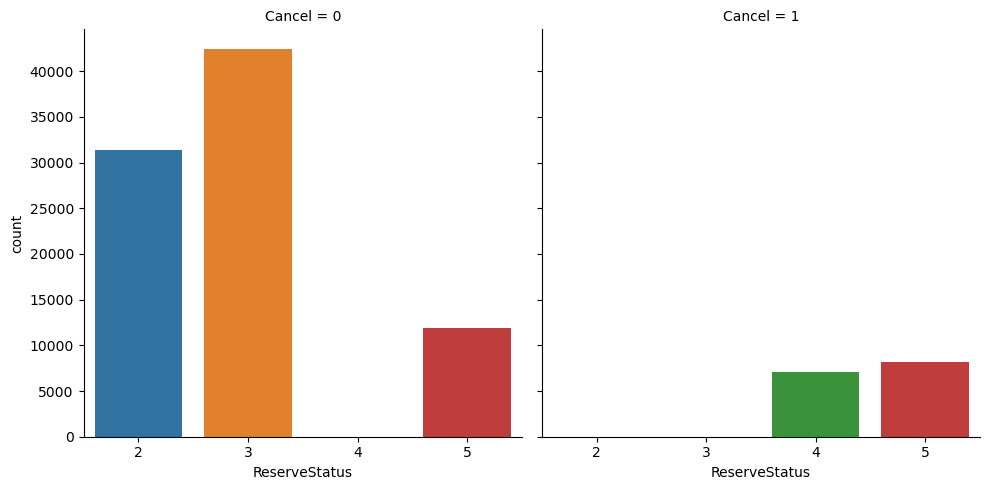

In [35]:
plt.figure(figsize=(12,4))

sns.catplot(data=df, x="ReserveStatus", col="Cancel", kind="count")  

### Cancelamento por status de pagamento

In [36]:
# Criando tabela para o plot
Status_Cancel = (
    df.groupby(["ReserveStatus", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="ReserveStatus", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
Status_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
Status_Cancel["Cancel %"] = ( Status_Cancel[1] / (Status_Cancel[0] + Status_Cancel[1]) * 100)

Status_Cancel.reset_index(inplace= True)

Status_Cancel

Cancel,ReserveStatus,0,1,Cancel %
0,2,31351.0000,0.0000,0.0000
1,3,42458.0000,0.0000,0.0000
2,4,0.0000,7099.0000,100.0000
3,5,11892.0000,8217.0000,40.8623


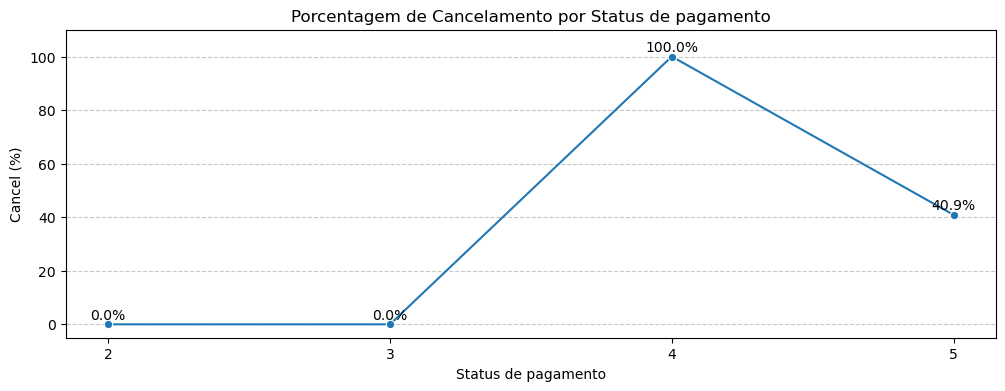

In [37]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Status_Cancel, x="ReserveStatus", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = Status_Cancel.apply(
    lambda row: g.text(
        row["ReserveStatus"],
        row["Cancel %"] + 2,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Ajustando o eixo X para números inteiros
plt.xticks(ticks=Status_Cancel["ReserveStatus"].astype(int), labels=Status_Cancel["ReserveStatus"].astype(int))

# Textos e estilos
plt.title("Porcentagem de Cancelamento por Status de pagamento")
plt.ylabel("Cancel (%)")
plt.xlabel("Status de pagamento")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por Gênero

In [38]:
# Criando tabela para o plot
Gender_Cancel = (
    df.groupby(["Male", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="Male", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
Gender_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
Gender_Cancel["Cancel %"] = ( Gender_Cancel[1] / (Gender_Cancel[0] + Gender_Cancel[1]) * 100)

Gender_Cancel.reset_index(inplace= True)

Gender_Cancel

Cancel,Male,0,1,Cancel %
0,0,33395,5877,14.9649
1,1,52306,9439,15.2871


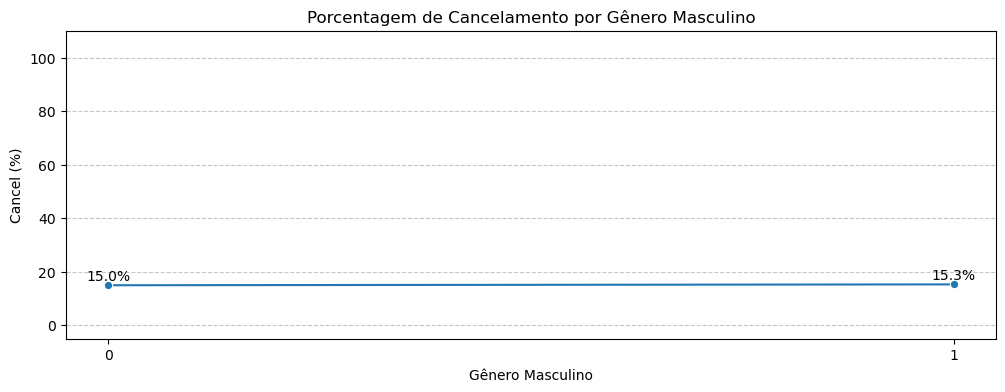

In [39]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Gender_Cancel, x="Male", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = Gender_Cancel.apply(
    lambda row: g.text(
        row["Male"],
        row["Cancel %"] + 2,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Ajustando o eixo X para números inteiros
plt.xticks(ticks=Gender_Cancel["Male"].astype(int), labels=Gender_Cancel["Male"].astype(int))

# Textos e estilos
plt.title("Porcentagem de Cancelamento por Gênero Masculino")
plt.ylabel("Cancel (%)")
plt.xlabel("Gênero Masculino")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por cupom de desconto

In [40]:
# Criando tabela para o plot
Discount_Cancel = (
    df.groupby(["CouponDiscount", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="CouponDiscount", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
Discount_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
Discount_Cancel["Cancel %"] = ( Discount_Cancel[1] / (Discount_Cancel[0] + Discount_Cancel[1]) * 100)

Discount_Cancel.reset_index(inplace= True)

Discount_Cancel

Cancel,CouponDiscount,0,1,Cancel %
0,0,80590,14412,15.1702
1,1,5111,904,15.0291


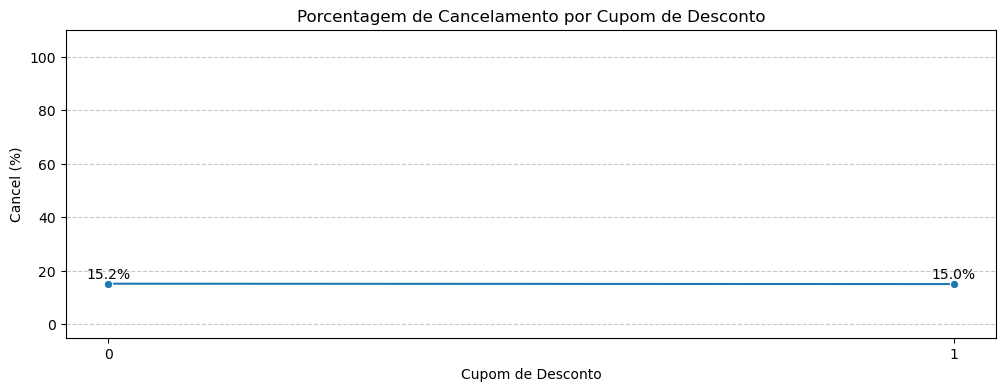

In [41]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Discount_Cancel, x="CouponDiscount", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = Discount_Cancel.apply(
    lambda row: g.text(
        row["CouponDiscount"],
        row["Cancel %"] + 2,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Ajustando o eixo X para números inteiros
plt.xticks(ticks=Discount_Cancel["CouponDiscount"].astype(int), labels=Discount_Cancel["CouponDiscount"].astype(int))


# Textos e estilos
plt.title("Porcentagem de Cancelamento por Cupom de Desconto")
plt.ylabel("Cancel (%)")
plt.xlabel("Cupom de Desconto")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por Vôo doméstico

In [42]:
# Criando tabela para o plot
Domestic_Cancel = (
    df.groupby(["Domestic", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="Domestic", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
Domestic_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
Domestic_Cancel["Cancel %"] = ( Domestic_Cancel[1] / (Domestic_Cancel[0] + Domestic_Cancel[1]) * 100)

Domestic_Cancel.reset_index(inplace= True)

Domestic_Cancel

Cancel,Domestic,0,1,Cancel %
0,0,730,65,8.1761
1,1,84971,15251,15.2172


In [43]:
print(Domestic_Cancel.dtypes)


Cancel
Domestic      int64
0             int64
1             int64
Cancel %    float64
dtype: object


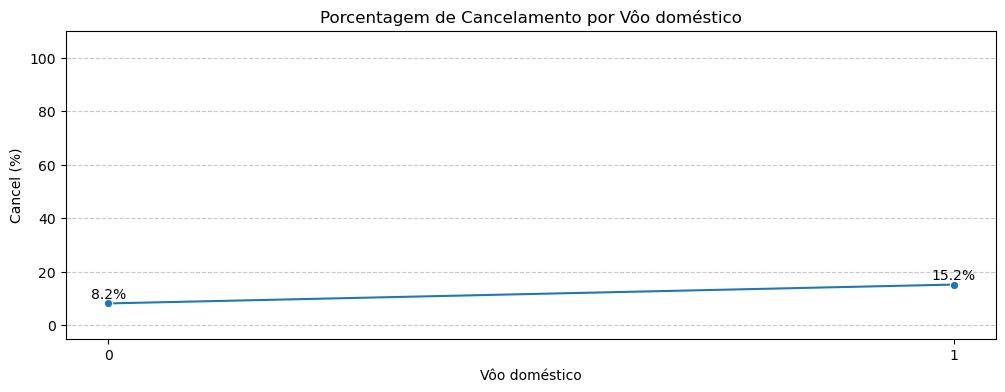

In [44]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Domestic_Cancel, x="Domestic", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = Domestic_Cancel.apply(
    lambda row: g.text(
        row["Domestic"],
        row["Cancel %"] + 2,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Ajustando o eixo X para números inteiros
plt.xticks(ticks=Domestic_Cancel["Domestic"].astype(int), labels=Domestic_Cancel["Domestic"].astype(int))


# Textos e estilos
plt.title("Porcentagem de Cancelamento por Vôo doméstico")
plt.ylabel("Cancel (%)")
plt.xlabel("Vôo doméstico")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por Tipo de veículo

In [45]:
# Criando tabela para o plot
VehicleType_Cancel = (
    df.groupby(["VehicleType", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="VehicleType", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
VehicleType_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
VehicleType_Cancel["Cancel %"] = ( VehicleType_Cancel[1] / (VehicleType_Cancel[0] + VehicleType_Cancel[1]) * 100)

VehicleType_Cancel.reset_index(inplace= True)

VehicleType_Cancel

Cancel,VehicleType,0,1,Cancel %
0,Air,11892,1715,12.6038
1,Land,73809,13601,15.5600


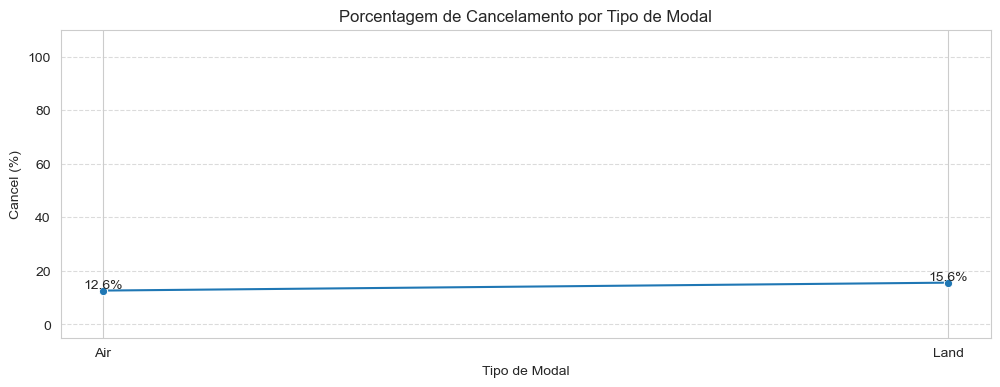

In [70]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=VehicleType_Cancel, x="VehicleType", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = VehicleType_Cancel.apply(
    lambda row: g.text(
        row["VehicleType"],
        row["Cancel %"] + 1,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Textos e estilos
plt.title("Porcentagem de Cancelamento por Tipo de Modal")
plt.ylabel("Cancel (%)")
plt.xlabel("Tipo de Modal")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por tipo de passagem (1° Classe)

In [47]:
# Criando tabela para o plot
VehicleClass_Cancel = (
    df.groupby(["VehicleClass", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="VehicleClass", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
VehicleClass_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
VehicleClass_Cancel["Cancel %"] = ( VehicleClass_Cancel[1] / (VehicleClass_Cancel[0] + VehicleClass_Cancel[1]) * 100)

VehicleClass_Cancel.reset_index(inplace= True)

VehicleClass_Cancel

Cancel,VehicleClass,0,1,Cancel %
0,0,44960,8972,16.6358
1,1,40741,6344,13.4735


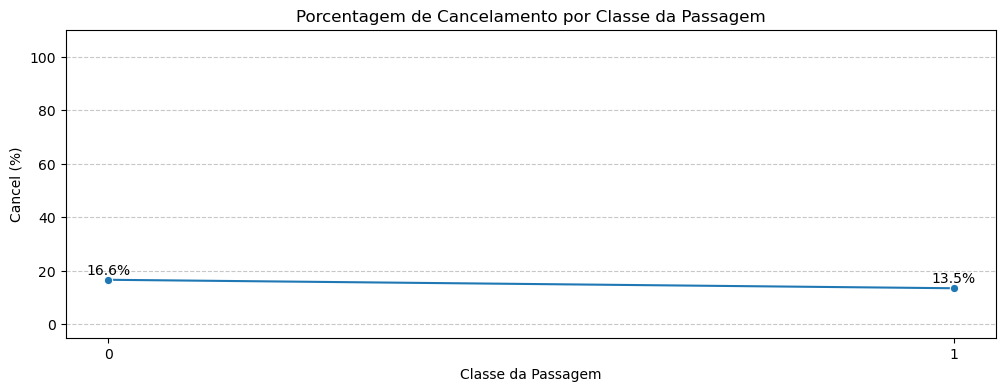

In [48]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=VehicleClass_Cancel, x="VehicleClass", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = VehicleClass_Cancel.apply(
    lambda row: g.text(
        row["VehicleClass"],
        row["Cancel %"] + 2,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Ajustando o eixo X para números inteiros
plt.xticks(ticks=VehicleClass_Cancel["VehicleClass"].astype(int), labels=VehicleClass_Cancel["VehicleClass"].astype(int))


# Textos e estilos
plt.title("Porcentagem de Cancelamento por Classe da Passagem")
plt.ylabel("Cancel (%)")
plt.xlabel("Classe da Passagem")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Cancelamento por Vehicle

In [49]:
# Criando tabela para o plot
Vehicle_Cancel = (
    df.groupby(["Vehicle", "Cancel"])
    .size()
    .reset_index(name="count")
    .pivot(index="Vehicle", columns="Cancel", values="count")
)

# Preenchendo os valores NA com 0
Vehicle_Cancel.fillna(0, inplace=True)

# Calculando % de Cancel
Vehicle_Cancel["Cancel %"] = ( Vehicle_Cancel[1] / (Vehicle_Cancel[0] + Vehicle_Cancel[1]) * 100)

Vehicle_Cancel.reset_index(inplace= True)

Vehicle_Cancel

Cancel,Vehicle,0,1,Cancel %
0,Bus,42458,6502,13.2802
1,InternationalPlane,730,65,8.1761
2,Plane,11162,1650,12.8786
3,Train,31351,7099,18.4629


In [50]:
print(Vehicle_Cancel.dtypes)


Cancel
Vehicle      object
0             int64
1             int64
Cancel %    float64
dtype: object


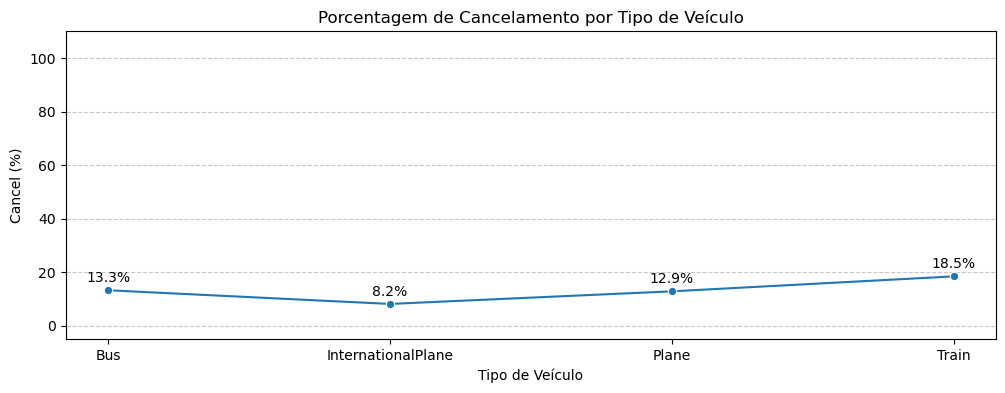

In [51]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Vehicle_Cancel, x="Vehicle", y="Cancel %", marker="o")

# Loop para colocar texto nos pontos
texts = Vehicle_Cancel.apply(
    lambda row: g.text(
        row["Vehicle"],
        row["Cancel %"] + 3,
        f"{row['Cancel %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

# Textos e estilos
plt.title("Porcentagem de Cancelamento por Tipo de Veículo")
plt.ylabel("Cancel (%)")
plt.xlabel("Tipo de Veículo")
plt.ylim(-5, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Modelagem

## Dataframe final

In [52]:
df_final = df.drop(['CancelTime','BillID', 'TicketID','From','To','HashPassportNumber_p','HashEmail','BuyerMobile','NationalCode','Created_month','Created_dayofweek','Created_hour',
                 'Canceltime_month','Canceltime_dayofweek','Canceltime_hour','DepartureTime_month','DepartureTime_dayofweek','DepartureTime_hour'], axis = 1)

In [53]:
df_final.head()

,ReserveStatus,UserID,Male,Price,CouponDiscount,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel
0,5,1,1,6600000.0000,1,1,Air,0,Work,Plane,0
1,5,1,1,9500000.0000,0,1,Air,0,Int,Plane,0
2,3,1,0,2000000.0000,0,1,Land,1,Work,Bus,0
3,2,0,0,40000.0000,0,1,Land,0,Int,Train,0
4,3,0,1,1130000.0000,0,1,Land,1,Int,Bus,0


### Transformando as variáveis preditoras em Dummies

In [54]:
df_final_dummies = pd.get_dummies(df_final, columns = ['ReserveStatus', 'VehicleType', 'TripReason', 'Vehicle'], drop_first= True, dtype= int)

### Train_test_split

In [57]:
X = df_final_dummies.drop('Cancel',axis=1)
y = df_final_dummies['Cancel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Função para exibição das métricas

In [58]:
def metricas(y_test, pred):
    print('\033[1m  Relatório de classificação:\033[0m' '\n', classification_report(y_test,pred), '\n'
      '\033[1m  Matriz de confusão: \033[0m' '\n', confusion_matrix(y_test,pred), '\n \n'
      '\033[1m  Acurácia: \033[0m' '\n',"%.4f" % accuracy_score(y_test, pred), '\n \n'
      '\033[1m  ROC AUC: \033[0m' '\n',"%.4f" % roc_auc_score(y_test, pred))

## Modelos

### Decision Tree

#### Melhores parâmetros

In [103]:
dtree = DecisionTreeClassifier(random_state= 101)

param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
}

CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
CV_dtree.fit(X_train, y_train)

dtree_best_model = CV_dtree.best_estimator_
print(dtree_best_model)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='sqrt', random_state=101)


#### Dtree final

In [59]:
dtree_final = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8, max_features='sqrt', random_state=101)
dtree_final.fit(X_train,y_train)
dtree_final_predictions = dtree_final.predict(X_test)

metricas(y_test, dtree_final_predictions)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     25668
           1       1.00      0.88      0.94      4638

    accuracy                           0.98     30306
   macro avg       0.99      0.94      0.96     30306
weighted avg       0.98      0.98      0.98     30306
 
  Matriz de confusão: 
 [[25668     0]
 [  541  4097]] 
 
  Acurácia: 
 0.9821 
 
  ROC AUC: 
 0.9417


### Random Forest

#### Melhores parâmetros

In [107]:
rfc = RandomForestClassifier(random_state= 101)

param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, verbose= True, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

rfc_best_model = CV_rfc.best_estimator_
print(rfc_best_model)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
RandomForestClassifier(max_depth=4, random_state=101)


#### RF final

In [60]:
rfc_final = RandomForestClassifier(max_depth=4, random_state=101)
rfc_final.fit(X_train,y_train)
rfc_final_predictions = rfc_final.predict(X_test)

metricas(y_test, rfc_final_predictions)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     25668
           1       1.00      0.89      0.94      4638

    accuracy                           0.98     30306
   macro avg       0.99      0.94      0.97     30306
weighted avg       0.98      0.98      0.98     30306
 
  Matriz de confusão: 
 [[25668     0]
 [  514  4124]] 
 
  Acurácia: 
 0.9830 
 
  ROC AUC: 
 0.9446


### XGboost

#### Melhores parâmetros

In [116]:
xgbc = XGBClassifier(random_state= 101)

param_grid = {
    'learning_rate': [0.001, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth' : [4,5,6,7,8]
}

CV_xgbc = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv= 10, scoring='accuracy', verbose= True, n_jobs=-1)
CV_xgbc.fit(X_train, y_train)

xgbc_best_model = CV_xgbc.best_estimator_
print(xgbc_best_model)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)


#### XGB final

In [61]:
xgb = XGBClassifier(learning_rate = 0.05, max_depth = 4, n_estimators=50)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

metricas(y_test, xgb_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     25668
           1       1.00      0.89      0.94      4638

    accuracy                           0.98     30306
   macro avg       0.99      0.94      0.97     30306
weighted avg       0.98      0.98      0.98     30306
 
  Matriz de confusão: 
 [[25668     0]
 [  514  4124]] 
 
  Acurácia: 
 0.9830 
 
  ROC AUC: 
 0.9446


### Gradient Boost

#### Melhores parâmetros

In [118]:
gbc = GradientBoostingClassifier(random_state= 101)

param_grid = { 
    'loss': ['log_loss'],
    'learning_rate': [0.001, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth' : [4,6,8],
    'criterion' :['friedman_mse', 'squared_error']
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 10, scoring='accuracy', n_jobs=-1)
CV_gbc.fit(X_train, y_train)

gbc_best_model = CV_gbc.best_estimator_
print(gbc_best_model)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=50,
                           random_state=101)


#### GB final

In [62]:
gbc = XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=50, random_state=101)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

metricas(y_test, gbc_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     25668
           1       1.00      0.89      0.94      4638

    accuracy                           0.98     30306
   macro avg       0.99      0.94      0.97     30306
weighted avg       0.98      0.98      0.98     30306
 
  Matriz de confusão: 
 [[25668     0]
 [  514  4124]] 
 
  Acurácia: 
 0.9830 
 
  ROC AUC: 
 0.9446


# Decisão

## Todos os modelos desempenharam bem, portanto irei optar pelo Random Forest

In [69]:
rfc_final = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=101)
rfc_final.fit(X_train,y_train)
rfc_final_predictions = rfc_final.predict(X_test)

metricas(y_test, rfc_final_predictions)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     25668
           1       1.00      0.89      0.94      4638

    accuracy                           0.98     30306
   macro avg       0.99      0.94      0.97     30306
weighted avg       0.98      0.98      0.98     30306
 
  Matriz de confusão: 
 [[25668     0]
 [  514  4124]] 
 
  Acurácia: 
 0.9830 
 
  ROC AUC: 
 0.9446


Text(0, 0.5, 'Score Variáveis Relevantes')

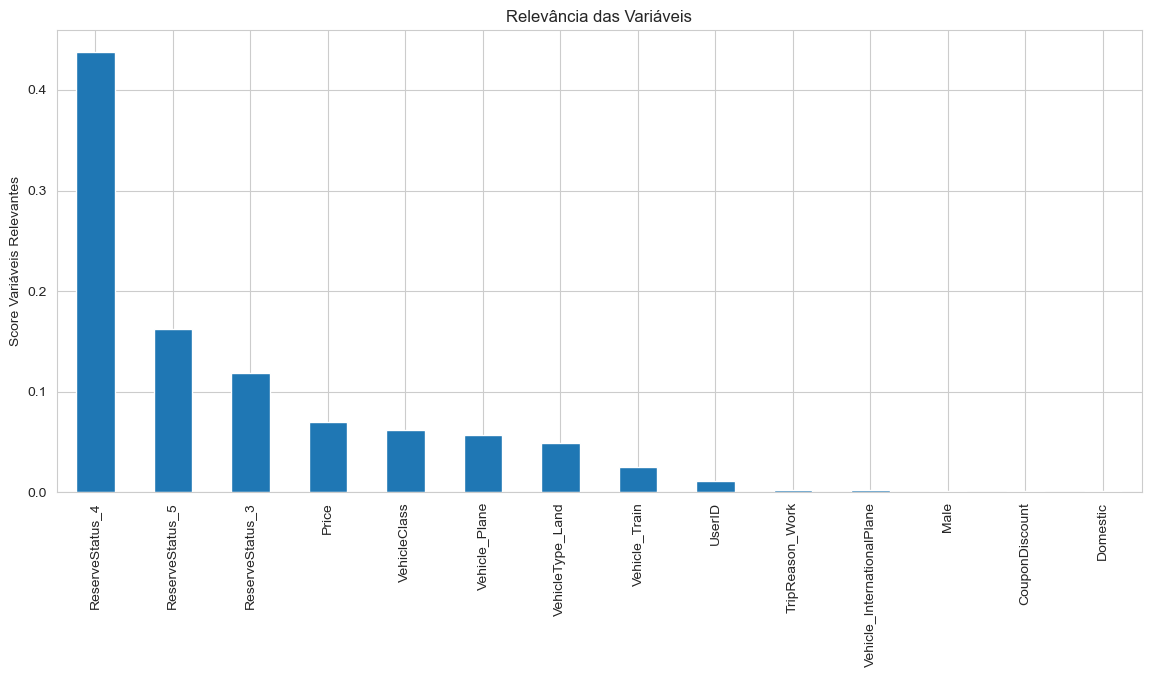

In [64]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

feat_imp = pd.Series(rfc_final.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Relevância das Variáveis')
plt.ylabel('Score Variáveis Relevantes')

# Pergunta 1) 

Com o gráfico acima, conseguimos vizualizar por ordem de relevância, quais variáveis mais afetam o modelo. Portanto, percebemos que características como os _**Status de pagamento**_, totalizam mais da metade do score de relevância, sendo assim o fator determinante quanto ao risco de cancelamento.

# Pergunta 2) 

Podemos dividir a maneira de indicar clientes com alto risco de cancelamento no momento de uma venda em 2 formas:

**1- Atráves de uma generalização, onde as chances são:** 

- **_Alta_ :** Se o Cliente tiver o **Status de pagamento (ReserveStatus)** na classe **4**, quanto maior o valor **(Price)** da passagem, e se a passagem é de primeira classe **(VehicleClass)** 
- **_Media_ :** : Se o Cliente tiver o **Status de pagamento (ReserveStatus)** na classe **5**, quanto maior o valor **(Price)** da passagem, e se a passagem é de primeira classe **(VehicleClass)**
- **_Baixa_ :**: Se o Cliente tiver o **Status de pagamento (ReserveStatus)** na classe **3**, quanto maior o valor **(Price)** da passagem, e se a passagem é de primeira classe **(VehicleClass)**

**2- Atráves do modelo selecionado (Random Forest), no qual teremos maior precisão na hora de classificar um novo cliente:**